<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Simulación Montecarlo </font> </center>




> El método de Montecarlo es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. El método se llamó así en referencia al Casino de Montecarlo (Mónaco) por ser “la capital del juego de azar”, al ser la ruleta un generador simple de números aleatorios. El nombre y el desarrollo sistemático de los métodos de Montecarlo datan aproximadamente de 1944 y se mejoraron enormemente con el desarrollo de la computadora.

Referencia:
- https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo

___
## 1. Introducción

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/5/54/Monte_carlo_method.svg" width="300px" height="100px" />

- Inventado por Stanislaw Ulam y a John von Neumann. Ulam ha explicado cómo se le ocurrió la idea mientras jugaba un solitario durante una enfermedad en 1946. 
- Advirtió que resulta mucho más simple tener una idea del resultado general del solitario haciendo pruebas múltiples con las cartas y contando las proporciones de los resultados que computar todas las posibilidades de combinación formalmente.
- Se le ocurrió que esta misma observación debía aplicarse a su trabajo de Los Álamos sobre difusión de neutrones, para la cual resulta prácticamente imposible solucionar las ecuaciones íntegro-diferenciales que gobiernan la dispersión, la absorción y la fisión.
- Dado que ya  empezaban a estar disponibles máquinas de computación para efectuar las pruebas numéricas, el método cobró  mucha fuerza.
- El método de Montecarlo proporciona soluciones aproximadas a una gran variedad de problemas matemáticos posibilitando la realización de experimentos con muestreos de números pseudoaleatorios en una computadora. El método es aplicable a cualquier tipo de problema, ya sea estocástico o determinista. 
- El método de Montecarlo tiene un error absoluto de la estimación que decrece como $\frac{1}{\sqrt{N}}$ en virtud del teorema del límite central.

### Ejemplo
Todos alguna vez hemos aplicado el método Montecarlo (inconscientemente). Como ejemplo, consideremos el juego de Astucia Naval.

Normalmente, primero se realizan una serie de tiros a puntos aleatorios. Una vez se impacta en un barco, se puede utilizar un algoritmo determinista para identificar la posición del barco y así terminar de derrumbarlo.



___
## 2. Caminata aleatoria
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/da/Random_Walk_example.svg" width="300px" height="100px" />

Una caminata aleatoria (*random walk* en inglés) es ua formalización matemática de la trayectoria que resulta al hacer pasos sucesivos aleatorios. Un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y en cada paso se mueve $+1$ o $-1$ con igual probabilidad.

Otros ejemplos:
- Trayectoria de una molécula al viajar en un fluido (líquido o gas).
- El camino que sigue un animal en su búsqueda de comida.
- El precio fluctuante de una acción.
- La situación de un apostador en un juego de azar.

Todos pueden ser aproximados por caminatas aleatorias, aunque no sean en verdad procesos aleatorios.

### Caminata aleatoria en una dimensión
Como dijimos, un ejemplo elemental de caminata aleatoria es la caminata aleatoria en la línea de números enteros $\mathbb{Z}$, la cual comienza en $0$ y a cada paso se mueve$+1$ o $-1$ con igual probabilidad.

Esta caminata se puede ilustrar como sigue:
- Se posiciona en $0$ en la línea de números enteros y una moneda justa se tira.
- Si cae en **sol** nos moveremos una unidad a la derecha.
- Si cae en **águila** nos moveremos una unidad a la izquierda.

Notemos que después de $5$ pasos podremos estar en 1, −1, 3, −3, 5, or −5. Las posibilidades son las siguientes:

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/05/Flips.svg" width="900px" height="300px" />


Referencia:
- https://en.wikipedia.org/wiki/Random_walk

**Importante:** librería random.

Referencia:
- https://docs.python.org/3/library/random.html

In [1]:
# Importar librería random
import random

In [2]:
help(random.choice)

Help on method choice in module random:

choice(seq) method of random.Random instance
    Choose a random element from a non-empty sequence.



In [3]:
for i in range(20):
    print(random.choice([-1,1]))

1
1
-1
1
-1
1
-1
-1
-1
-1
1
-1
-1
-1
1
1
-1
-1
1
-1


In [4]:
# Escribir una función que genere el resultado 
# de una caminata aleatoria de N pasos

def caminata_aleatoria(N):
    P=[0]
    for i in range(N):
        Z_i = random.choice([-1,1])
        P.append(P[-1] + Z_i)
    
    return P


In [5]:
seq = caminata_aleatoria(10)
seq

[0, 1, 2, 3, 2, 3, 4, 5, 4, 5, 6]

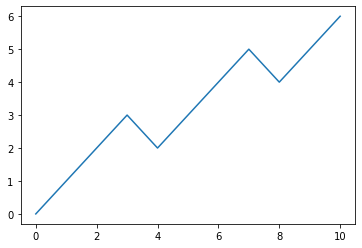

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(seq)

**Actividad.** Graficar, en una misma ventana de gráficos, al menos ocho caminatas aleatorias de 100 pasos.

In [7]:
# Importar librería de gráficos 2d
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
# Solucionar acá


### Usamos montecarlo para evaluar el resultado de la caminata aleatoria

- Describir, de nuevo, el proceso de la caminata aleatoria en el pizarrón y ver el valor esperado de la caminata después de N pasos.

- Luego, evaluar el proceso utilizando montecarlo y comparar resultados.

In [9]:
def ultima_posicion_caminata_aleatoria(N):
    P=0
    for i in range(N):
        Z_i = random.choice([-1,1])
        P = P + Z_i
    
    return P

In [10]:
N = 1000
ultima_posicion_caminata_aleatoria(N)

50

In [11]:
# List Comprehensions
ultimas_posiciones = [ultima_posicion_caminata_aleatoria(1000) for i in range(10)]
ultimas_posiciones

[-74, -40, 50, 2, 46, 2, 32, 2, 22, 8]

In [12]:
ultimas_posiciones = [ultima_posicion_caminata_aleatoria(1000) for i in range(1000)]
ultimas_posiciones

[50,
 -10,
 12,
 -70,
 -2,
 -60,
 -20,
 -2,
 12,
 -20,
 12,
 26,
 14,
 -8,
 2,
 100,
 34,
 -18,
 6,
 2,
 0,
 2,
 -50,
 4,
 -38,
 62,
 42,
 24,
 12,
 66,
 -24,
 -38,
 22,
 6,
 8,
 22,
 12,
 -42,
 -36,
 -34,
 64,
 -32,
 -18,
 -54,
 -18,
 -14,
 -30,
 -46,
 -14,
 14,
 34,
 -6,
 -66,
 6,
 20,
 -8,
 -38,
 26,
 12,
 -98,
 -26,
 44,
 2,
 32,
 -24,
 2,
 14,
 6,
 62,
 -38,
 10,
 -40,
 14,
 -14,
 10,
 16,
 12,
 -2,
 16,
 12,
 -8,
 -24,
 -6,
 -14,
 -24,
 2,
 -56,
 58,
 50,
 -42,
 -30,
 -16,
 16,
 -70,
 16,
 8,
 -6,
 30,
 -68,
 -16,
 14,
 -4,
 -6,
 22,
 -90,
 -20,
 54,
 60,
 -28,
 -16,
 -32,
 34,
 -8,
 -24,
 -8,
 16,
 34,
 8,
 26,
 -62,
 -6,
 -40,
 24,
 -4,
 -12,
 0,
 -18,
 -28,
 0,
 26,
 -6,
 64,
 -16,
 42,
 -14,
 74,
 -54,
 -40,
 50,
 32,
 38,
 -2,
 26,
 18,
 14,
 12,
 -30,
 26,
 6,
 -22,
 22,
 38,
 4,
 50,
 -10,
 -30,
 -42,
 -70,
 -50,
 52,
 6,
 -24,
 -26,
 48,
 -18,
 -46,
 -8,
 -22,
 -16,
 -6,
 -8,
 -8,
 0,
 -76,
 46,
 22,
 26,
 -6,
 -6,
 -6,
 18,
 -24,
 -40,
 26,
 30,
 -28,
 22,
 -72,
 2,
 -20

In [13]:
import numpy as np
x=np.linspace(-100,100)
sigma = np.sqrt(1000)
p = (1/(sigma*np.sqrt(2*np.pi)))* np.exp(-x**2/(2*sigma**2))

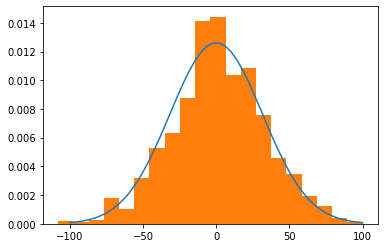

In [14]:
plt.figure(figsize=(6,4))
plt.plot(x,p)
plt.hist(ultimas_posiciones, bins=20, density=True)
plt.show()

## Ejemplo

Ahora, para comprender el alcance de la simulación Montecarlo, tomaremos el ejemplo de un apostador básico.

Referencia:
- https://pythonprogramming.net/monte-carlo-simulator-python/

Supongamos que estamos en un casino especial, donde el usuario puede tirar un *dado metafórico* que puede dar como resultado del número uno (1) al número cien (100).

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

Con esto, el casino mantiene un margen del 1%, el cual es mucho más pequeño que el margen típico en casinos, al igual que el margen de mercado cuando se incorporan costos por transacción.

Por ejemplo, [Scottrade](https://www.scottrade.com/) cobra $\$7$ USD por transacción. Si se invierten $\$1000$ USD por acción, esto significa que tienes que pagar $\$7$ USD para entrar, y $\$7$ USD para salir, para un total de $\$14$ USD.

Esto pone el margen en 1.4\%. Esto significa, que a largo plazo, las ganancias tienen que ser mayores a 1.4\% en promedio, de otra manera se estará perdiendo dinero. Aunque este porcentaje es pequeño, las probabilidades ya están en contra. La comercialización de acciones es un juego 50/50, especialmente en el corto plazo.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 el usuario gana. Un 100 significa que la casa gana.

Ahora, comencemos. Primero tenemos que crear nuestro dado.

In [15]:
# Explorar función randint de la librería random y 
# crear una función que simule la tirada de un dado
help(random.randint)

Help on method randint in module random:

randint(a, b) method of random.Random instance
    Return random integer in range [a, b], including both end points.



In [24]:
# función que simula la tirada de un dado
def tirar_dado():
    return random.randint(1,100)

In [28]:
# Tirar el dado 100 veces para comprobar que nuestra 
# función si trabaja correctamente (print)
for j in range(100):
    print(tirar_dado())

19
32
2
51
57
50
57
93
14
2
67
93
56
30
28
3
92
44
91
24
19
6
28
37
5
34
18
34
97
58
72
19
99
57
36
43
64
6
29
71
2
39
34
24
22
55
74
92
99
85
3
19
88
3
48
74
29
46
8
41
35
9
79
100
62
7
55
52
23
36
19
70
58
21
54
40
35
47
81
15
57
65
20
67
11
62
44
58
70
85
99
26
91
7
6
61
41
73
13
45


Sin embargo, el dado por si solo no nos es útil. Necesitamos una función que nos devuelva sólamente si ganamos o perdemos.

In [29]:
# Cambiar/usar la anterior función para obtener una 
# que devuelva simplemente ganar(true) o perder(false)
def jugar():
    resultado = tirar_dado()
    if (resultado>=51) and (resultado<=99):
        ganar = True
    else:
        ganar = False
    
    return ganar

In [32]:
# Probar la función creada para ver que funcione.
# Crear contadores para ver la cantidad de veces que 
# ganamos y la cantidad de veces que perdemos
jugar(), jugar(), jugar()

(True, False, True)

Ahora, necesitamos crear un apostador. Empezaremos con uno extremadamente básico por ahora. Veremos, que aún con un apostador muy básico, veremos cosas muy reveladoras usando un simulador montecarlo.

In [34]:
# Crearemos un apostador simple. Las caracterísitcas son:
# se empieza con un capital inicial, 
# siempre se apuesta lo mismo,
# y se va a apostar un número determinado de veces.
# Si se gana, se añade la apuesta al capital,
# si se pierde, se descuenta la apuesta del capital.
# La función debe devolver un arreglo con el capital
# al final de cada apuesta.
def apostador(cap_ini, apuesta, n_apuestas):
    capital=[cap_ini]
    
    for _ in range(n_apuestas):
        ganar = jugar()
        if ganar:
            capital.append(capital[-1]+apuesta)
        else:
            capital.append(capital[-1]-apuesta)
            
    return capital
        

In [35]:
apostador(1000, 100, 100)

[1000,
 1100,
 1200,
 1100,
 1200,
 1100,
 1000,
 1100,
 1000,
 1100,
 1200,
 1300,
 1200,
 1100,
 1200,
 1300,
 1200,
 1300,
 1400,
 1500,
 1400,
 1300,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1600,
 1700,
 1600,
 1700,
 1800,
 1900,
 2000,
 1900,
 2000,
 1900,
 1800,
 1900,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2600,
 2500,
 2400,
 2500,
 2600,
 2700,
 2600,
 2500,
 2600,
 2700,
 2800,
 2700,
 2600,
 2500,
 2400,
 2500,
 2400,
 2500,
 2400,
 2300,
 2400,
 2300,
 2200,
 2100,
 2200,
 2100,
 2000,
 2100,
 2200,
 2300,
 2400,
 2500,
 2400,
 2300,
 2200,
 2300,
 2200,
 2100,
 2000,
 1900,
 2000,
 2100,
 2000,
 1900,
 1800,
 1900,
 1800,
 1700,
 1800,
 1700,
 1800,
 1700,
 1600,
 1700,
 1600]

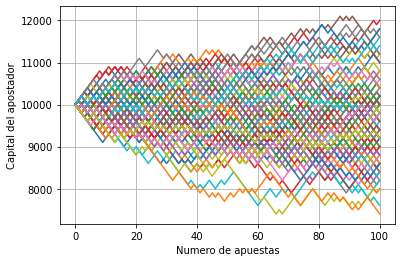

In [37]:
# Ver como evolucionan los fondos de nuestro apostador 
# al jugar 100 veces, con un capital inicial de 10000 pesos
# y con un monto de apuesta de 100 pesos.
plt.figure(figsize=(6,4))
m=100

for _ in range(m):
    capital_apostador = apostador(10000, 100, 100)
    
    plt.plot(capital_apostador)
plt.xlabel('Numero de apuestas')
plt.ylabel('Capital del apostador')
plt.grid()
plt.show()

En realidad no nos importa tanto como evolucionan estos fondos. Nos importa más cuáles son los fondos al final (al largo plazo). Modificar la función anterior para ver esto.

In [38]:
# Función de apostador que devuelve los fondos
# al final de apostar una cantidad determinadad de veces
def apostador2(cap_ini, apuesta, n_apuestas):
    capital=cap_ini
    
    for _ in range(n_apuestas):
        ganar = jugar()
        if ganar:
            capital = capital + apuesta
        else:
            capital = capital - apuesta
            
    return capital    
    

In [42]:
# (Montecarlo) Simular varios (100) escenarios 
# en que se apuestan 50, 100, 1000 y 10000 veces. ¿Qué pasa?
n_apuestas =10000
for _ in range(100):
    print(apostador2(cap_ini=10000, apuesta=100, n_apuestas= n_apuestas))

-25400
-3800
-11600
-12400
-18600
3600
-26400
-18600
-1000
-14800
4200
-12400
-6200
-32600
-19200
-3600
-20600
-15800
-4000
-13800
-14800
-6600
-12000
-15000
-4200
-20600
-4200
-18400
-26600
-3400
-14400
-21200
-11200
-6200
-3000
6400
-5000
-12200
-21400
-16400
-20400
-11000
-13400
-20400
-14800
4200
-14600
5000
-13600
-17400
-19600
-1600
11200
-14400
-1800
-17000
-12000
-7200
-3000
3600
-13600
4000
-9000
-8600
-8600
-12800
-18200
-6800
-7800
1800
-10800
-13400
-12000
-11400
-9800
-39600
-21000
-26000
-4600
-13400
-17000
-13600
-22200
-20000
-10200
-13600
-6200
-2000
-8800
-15200
-3800
-11200
-18800
-6200
-22600
-28400
-1000
-8600
-14000
-33200


Vemos que al largo plazo la mayoría de los apostadores quebraron. Sin embargo, esta forma de visualizar los resultados no es adecuada. Utilicemos matplotlib.

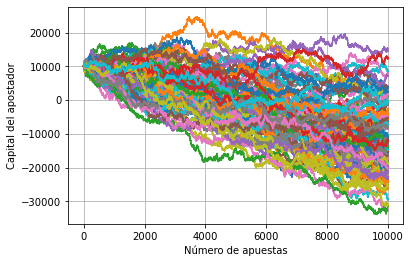

In [45]:
# (Montecarlo) Simular varios (100) escenarios 
# en que se apuestan 50, 100, 1000 y 10000 veces. ¿Qué pasa?
plt.figure(figsize=(6,4))
m=100
for _ in range(m):
    capital_apostador = apostador(cap_ini=10000, apuesta=100, n_apuestas=10000)
    plt.plot(capital_apostador)
    
plt.xlabel('Número de apuestas')
plt.ylabel('Capital del apostador')
plt.grid()
plt.show()

Por esto los apostadores pierden. Normalmente las probabilidades no están evidentemente muy en contra de ellos, solo un poco. Los casinos únicamente entienden psicología básica: ganar es extremadamente adictivo. Por ello, los casino se construyen para mantenerte jugando.

En el corto plazo, la mayoría de los jugadores no se dan cuenta que son más propensos a perder. Las veces que ganan y pierden son muy parejas. Estadísticamente, casi la mitad de las personas terminarán con ganancias después de jugar unas pocas veces. El problema es la adicción, y que ellos continuarán apostando, y por ende perdiendo sus ganancias. Es matemática extremadamente básica, pero la psicología humana es débil.